<a href="https://colab.research.google.com/github/nadgir-praveen/data-science-lab/blob/main/assignments/PN_M2_NB_MiniProject_5_Customer_Segmentation_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Customer segmentation using clustering

## Learning Objectives

At the end of the experiment, you will be able to :

* extract summary level insight from a given customer dataset.

* handle the missing data and identify the underlying pattern or structure of the data.

* create an unsupervised model that generates the optimum number of segments for the customer base

* identify customer segments based on the overall buying behaviour


## Dataset

The dataset chosen for this mini project is the Online Retail dataset. It is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

The dataset contains 541909 records, and each record is made up of 8 fields.

To know more about the dataset : [click here](https://archive.ics.uci.edu/ml/datasets/Online+Retail)

## Information

**Clustering** is the task of grouping together a set of objects so that the objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a measure that reflects the strength of the relationship between two data objects.

In the clustering calculation, K-Means is a very popular algorithm. In this analysis, this method is used to cluster the similar data items.

In Retail and E-Commerce (B2C), and more broadly in B2B, one of the key elements shaping the business strategy of a firm is understanding of customer behaviour. More specifically, understanding the customers based on different business metrics: how much they spend (revenue), how often they spend (frequency), are they new or existing customers, what are their favorite products, etc... Such understanding in turn helps direct marketing, sales, account management and product teams to support customers on a personalized level and improve the product offering.

Furthermore, segmenting customers into different categories based on similar/cyclical buying pattern over a period of 1 year helps the retail shops manage their inventory better, thereby lowering costs and raising revenues by placing the orders in sync with the buying cycles.

## Problem Statement

Perform customer segmentation for an Online Retail using an Unsupervised Clustering technique

## Grading = 10 Points

### Import Required packages

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

## Data Wrangling

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Online_Retail.zip
!unzip -qq Online_Retail.zip

## Load the data

In [ ]:
# YOUR CODE HERE
df = pd.read_csv('/content/Online_Retail_Train.csv')

## Data Pre-processing (2 points)

Explore the dataset by performing the following operations:

* There is a lot of redundant data. Identify such data and take appropriate action.

  **Hint:** refer to this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

* Most Invoices appear as normal transactions with positive quantity and prices, but there are some prefixed with "C" or "A" which denote different transaction types. Invoice starting with C represents cancelled order and A represents the Adjusted. Identify such data and take appropriate action.

  **Hint:** Check the negative values in Quantity column for all cancelled orders

* Handle the null values by dropping or filling with appropriate mean


* Some of the transactions based on the `StockCode` variable are not actually products, but representing the costs or fees regarding to the post or bank or other tansactions. Find such data and handle it accordingly.

  Hint:
    - The transaction with `'POST' 'PADS' 'M' 'DOT' 'C2' 'BANK CHARGES'` as their `StockCodes` are considered as irrelevant transactions.

* Identify the outliers in the UntiPrice and Quantity and handle them accordingly.

  **Hint:** [link](https://kanoki.org/2020/04/23/how-to-remove-outliers-in-python/)

* Create a DayOfWeek column using `InvoiceDate`, Hint: pd.to_datetime()

**Note:** Perform all the above operations using a function to reuse and apply the same for test data.

In [ ]:
def handle_outliers(df, attribute):
    df[[attribute]].boxplot()
    plt.show()
    Q1 = np.quantile(df[attribute], 0.25)
    Q3 = np.quantile(df[attribute], 0.75)
    print(f'Attribute={attribute} Q1= {Q1}, Q3= {Q3}')
    df[attribute] = df[attribute].apply(lambda d: Q3 if d>Q3 else Q1 if d<Q1 else d)
    df[[attribute]].boxplot()
    plt.show()

In [ ]:
# YOUR CODE HERE
def preprocess(df):
    try:
        cancelled_invoices = df[df['InvoiceNo'].str.startswith(('C','A'))]
        df.drop(cancelled_invoices.index, inplace=True)
    except Exception as err:
        print(err)
        pass

    invalid_transactions = df[df['StockCode'].isin(['POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES'])]
    df.drop(invalid_transactions.index, inplace=True)

    handle_outliers(df, 'UnitPrice')
    handle_outliers(df, 'Quantity')

    df['DayOfWeek'] = pd.to_datetime(df['InvoiceDate']).apply(lambda d: d.weekday())
    df.drop(columns=['InvoiceDate'], inplace=True)

    df.dropna(subset=['CustomerID'], inplace=True)


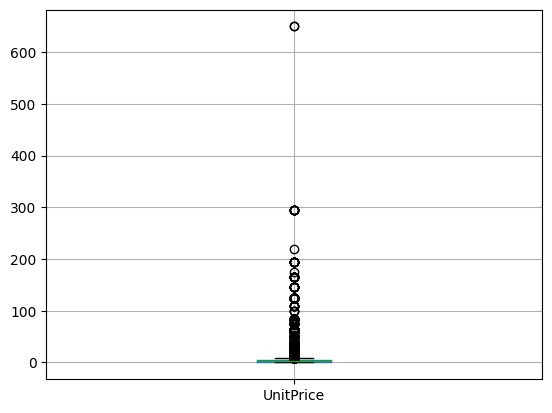

Attribute=UnitPrice Q1= 1.25, Q3= 4.13


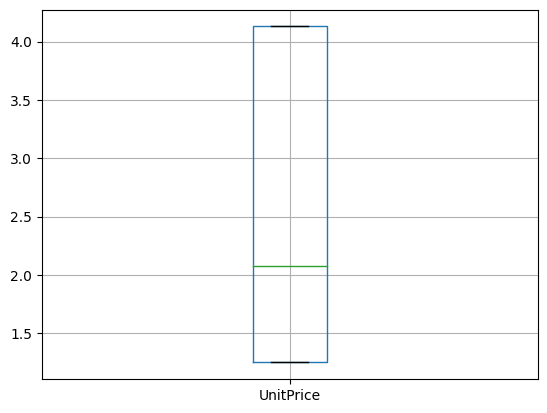

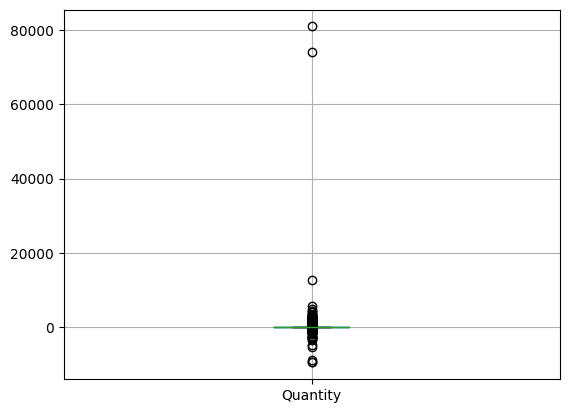

Attribute=Quantity Q1= 1.0, Q3= 11.0


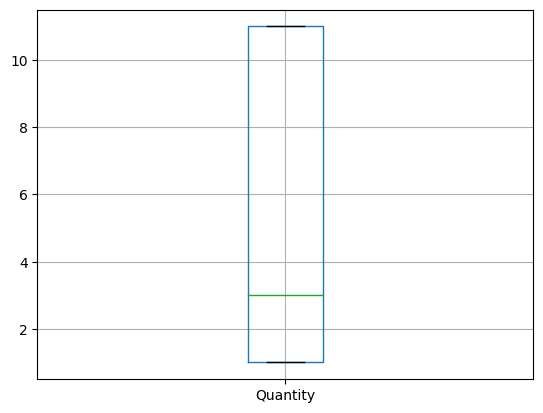

In [ ]:
preprocess(df)

# df.isnull().sum()
# df.isna().sum()
# df.info()

## Understanding new insights from the data (1 point)

1.  Are there any free items in the data? How many are there?

2.  Find the number of transactions per country and visualize using an appropriate plot

3.  What is the ratio of customers who are repeat purchasers vs single-time purchasers? Visualize using an appropriate plot.

4. Plot heatmap showing unit price per month and day of the week

  **Hint:** Month name as index on Y-axis, Day of the week on X-axis

5. Find the top 10 customers who bought the most no.of items. Also find the top 10 Items bought by most no.of customers.

In [ ]:
# YOUR CODE HERE
print(df[df['UnitPrice']==0.0].shape[0])

0


Country
Australia                 1132
Austria                    366
Bahrain                     12
Belgium                   1848
Brazil                      32
Canada                     141
Channel Islands            707
Cyprus                     581
Czech Republic              24
Denmark                    351
EIRE                      6760
European Community          53
Finland                    618
France                    7617
Germany                   8194
Greece                     133
Iceland                    171
Israel                     237
Italy                      702
Japan                      304
Lebanon                     43
Lithuania                   32
Malta                      103
Netherlands               2194
Norway                    1003
Poland                     311
Portugal                  1349
RSA                         54
Saudi Arabia                 8
Singapore                  203
Spain                     2299
Sweden                     407


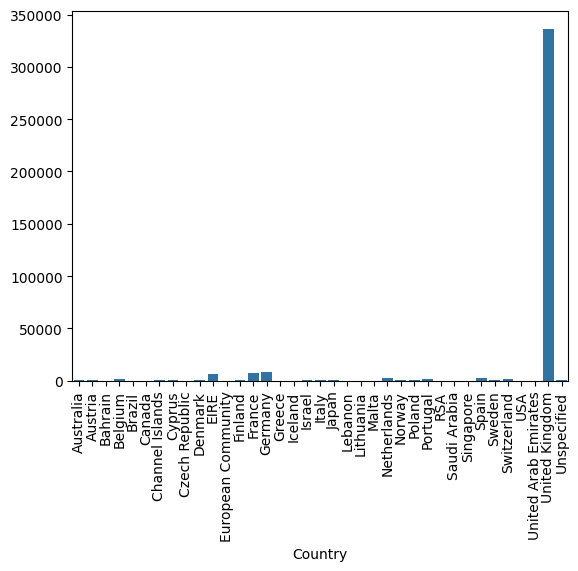

In [ ]:
country_counts = df.groupby(['Country'])['InvoiceNo'].count()
print(country_counts)
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xticks(rotation=90)
plt.show()

## Feature Engineering and Transformation (2 points)

### Create new features to uncover better insights and drop the unwanted columns

* Create a new column which represents Total amount spent by each customer

    **Hint:** Quantity * UnitPrice

* Customer IDs are seen to be repeated. Maintain unique customer IDs by grouping and summing up all possible observations per customer.

    **Hint:** [pandas.groupby.agg](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

**Note:** Perform the above operations in function, to reuse and apply the same for test data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376646 entries, 0 to 514812
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    376646 non-null  object 
 1   StockCode    376646 non-null  object 
 2   Description  376646 non-null  object 
 3   Quantity     376646 non-null  float64
 4   UnitPrice    376646 non-null  float64
 5   CustomerID   376646 non-null  float64
 6   Country      376646 non-null  object 
 7   DayOfWeek    376646 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 25.9+ MB


In [ ]:
def dummy_encode(df, cats):
    encoded_df = pd.get_dummies(df[cats], prefix_sep='_', drop_first = True)
    df = pd.concat([df, encoded_df], axis=1)
    df.drop(cats, axis=1, inplace=True)
    return df


In [ ]:
from sklearn.preprocessing import LabelEncoder
def label_encode(df, cats):
    le = LabelEncoder()
    le.fit(df[cats].values)
    df[cats] = le.transform(df[cats].values)
    return df

In [ ]:
# YOUR CODE HERE
def preprocess_2(df):
    df['total_amount'] = df['Quantity']*df['UnitPrice']
    df.drop(columns=['UnitPrice', 'InvoiceNo','Description', 'StockCode'])
    df['Frequency'] = 1
    df = df.groupby(['CustomerID'], as_index=False).agg({
                                    'total_amount': sum,
                                    'Quantity': sum,
                                    'Country': 'first',
                                    'DayOfWeek': 'first',
                                    'Frequency': sum
                                    })
    # df = dummy_encode(df, ['Country'])
    # df = label_encode(df, 'Country')
    df.drop(columns=['Country'], inplace=True)
    df.drop(columns=['CustomerID'], inplace=True)
    df.reset_index()
    return df



In [ ]:
df = preprocess_2(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4333 entries, 0 to 4332
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_amount  4333 non-null   float64
 1   Quantity      4333 non-null   float64
 2   DayOfWeek     4333 non-null   int64  
 3   Frequency     4333 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 135.5 KB


### Scale the data

Apply `StandardScaler` on the features.

In [ ]:
# YOUR CODE HERE for scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features = df.columns
# scaler.fit(df[features])
# df[features] = scaler.transform(df[features])


## Clustering ( 5 points)

### Apply k-means algorithm to identify a specific number of clusters


* Fit the k-means model

* Extract and store the cluster centroids

Below are the parameters for k-means, which are helpful

**n_clusters** is no. of clusters specified

**k-means++** is a random initialization method for centroids to avoid random initialisation trap

**max_iter** is max no of iterations defined when k-means is running

**n_init** is no. of times k-means will run with different initial centroids

[why-is-k-means-slower-than-random-initialization-k-means](https://stats.stackexchange.com/questions/185396/why-is-k-means-slower-than-random-initialization-k-means/185422)

In [ ]:
# YOUR CODE HERE to apply KMeans
X = df[features]

kmeans = KMeans(n_clusters=4, random_state=42, n_init=5)
kmeans.fit(X)


KMeans(n_clusters=4, n_init=5, random_state=42)

In [ ]:
print(kmeans.labels_)
print(kmeans.cluster_centers_)
kmeans.inertia_

[1 3 1 ... 1 1 1]
[[2.67514300e+04 1.29964545e+04 1.81818182e+00 2.53672727e+03]
 [6.15909959e+02 3.10482443e+02 2.58778626e+00 5.39862595e+01]
 [8.68739600e+04 4.22170000e+04 3.00000000e+00 5.28700000e+03]
 [4.38528839e+03 2.17943734e+03 2.39130435e+00 3.35777494e+02]]


4578118493.745031

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

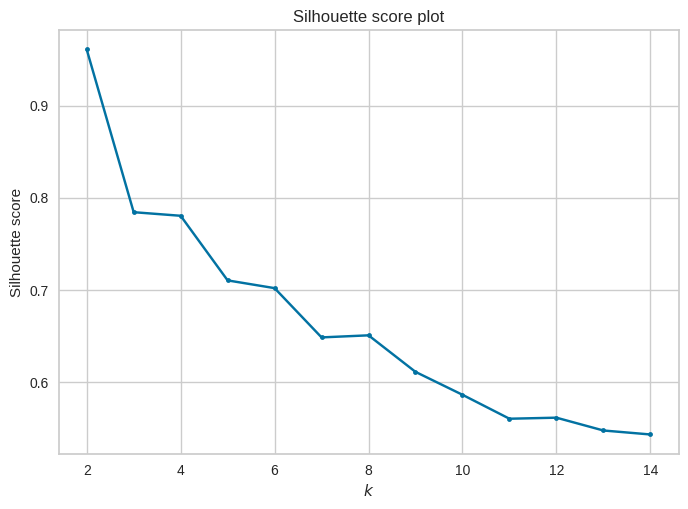

In [ ]:
# Plot Silhouette score plot
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

clusters = np.arange(2,15)
sil_score = []
for c in clusters:
    kmeans = KMeans(n_clusters=c, random_state=1)
    kmeans.fit(X)
    sil_score.append(silhouette_score(X, kmeans.labels_))
plt.plot(clusters, sil_score, marker= '.')
plt.title('Silhouette score plot')
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


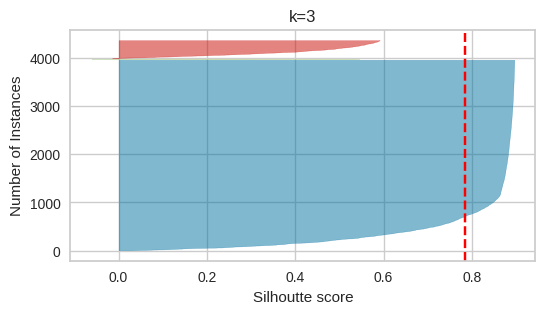

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


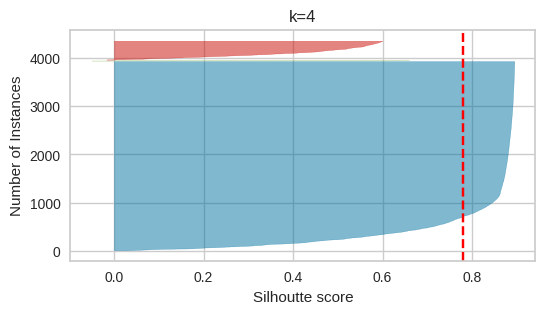

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


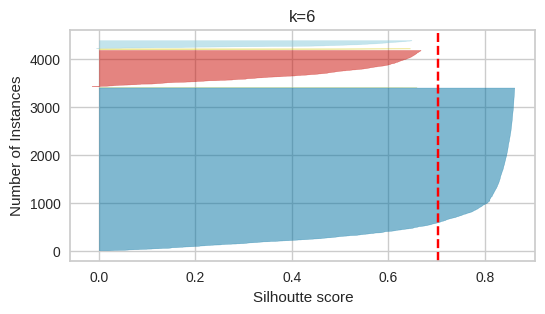

In [ ]:
# Plot Silhouette Diagram

clusters = [3, 4, 6]
for c in clusters:
    plt.figure(figsize=(6, 3))
    # Instantiate the clustering model and visualizer
    kmeans = KMeans(c, random_state=1)
    # Instantiate SilhouetteVisualizer()
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    # Fit the data to the visualizer
    visualizer.fit(X);
    plt.title("k={}".format(c))
    plt.xlabel("Silhoutte score")
    plt.ylabel("Number of Instances")
    plt.show()

#### Find the optimal number of clusters (K) by using the [Elbow method](https://pythonprogramminglanguage.com/kmeans-elbow-method/).

Use the optimal no. of clusters and store the cluster centroids

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

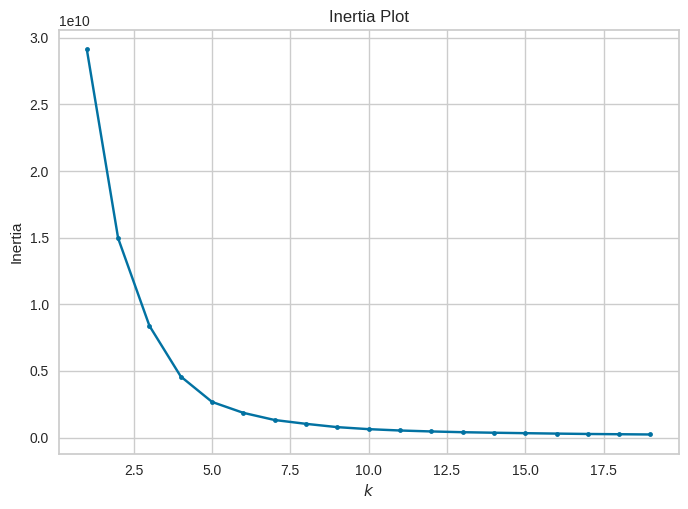

In [ ]:
# YOUR CODE HERE
clusters = np.arange(1,20)
inertia = []
for c in clusters:
    kmeans = KMeans(n_clusters = c, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(clusters, inertia, marker= '.')
# plt.arrow(5, 400, -2, -252)
# plt.text(5, 410, "Elbow", fontdict={'size': 12})
plt.title('Inertia Plot')
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.show()

### Apply DBSCAN algorithm for clustering

- Compare the results of clusters from k-means and DBSCAN


In [ ]:
# YOUR CODE HERE
dbscan = DBSCAN(eps=0.01, min_samples=5)
dbscan.fit(X)
print("Unique clusters in data: ", np.unique(dbscan.labels_))

Unique clusters in data:  [-1  0  1  2]


In [ ]:
# Number of core instances their indices and position
num_of_core_instns = len(dbscan.core_sample_indices_)
print("Number of core instances: ", num_of_core_instns)

core_instns_indices = dbscan.core_sample_indices_
print("First 10 core instances indices: ", core_instns_indices[0:10])

core_instns = dbscan.components_
print("First 10 core instances: \n", core_instns[0:10])

Number of core instances:  20
First 10 core instances indices:  [ 208  514  571  576  769 1285 2028 2432 2741 2787]
First 10 core instances: 
 [[45.43 11.    4.    1.  ]
 [45.43 11.    4.    1.  ]
 [13.75 11.    3.    1.  ]
 [45.43 11.    4.    1.  ]
 [13.75 11.    3.    1.  ]
 [13.75 11.    2.    1.  ]
 [13.75 11.    3.    1.  ]
 [13.75 11.    3.    1.  ]
 [13.75 11.    3.    1.  ]
 [13.75 11.    2.    1.  ]]


### Analyze the clusters


- consider two features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** 2D plot

- consider three features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** [3D plot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


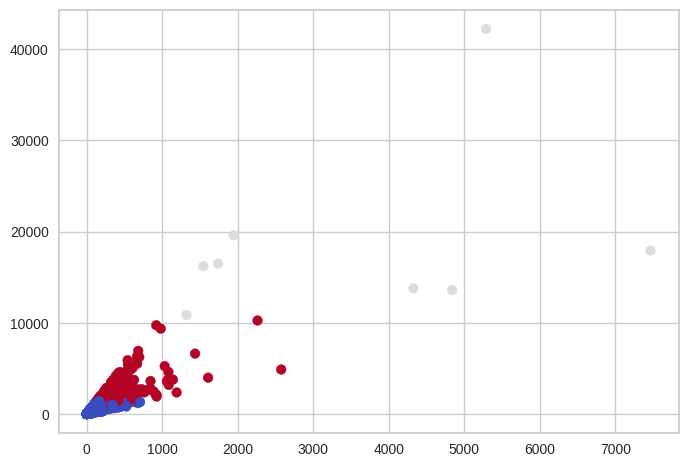

In [ ]:
# YOUR CODE HERE
# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_predict = kmeans.fit_predict(X)
plt.scatter(X['Frequency'], X['Quantity'], c=y_predict, cmap='coolwarm')
plt.show()

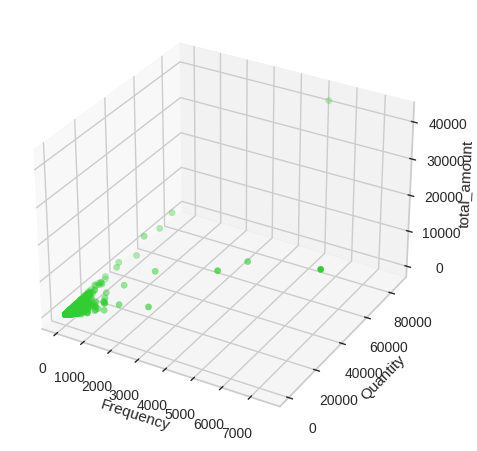

In [ ]:
fig = plt.figure()
ax = plt.axes(projection ='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
# for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
#     ax.scatter(X['Frequency'], X['total_amount'], X['Quantity'], marker=m, cmap= 'coolwarm')

ax.scatter(X['Frequency'], X['total_amount'], X['Quantity'], c="limegreen")

ax.set_xlabel('Frequency')
ax.set_ylabel('Quantity')
ax.set_zlabel('total_amount')

plt.show()

### Train a supervised algorithm on clustered data

This will allow us to predict cluster numbers (label) for each test data instance

* Create labelled data with k-means cluster labels
  
  **Hint**: [`kmeans.labels_`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
)
* Split the data into train and validation sets
* Train a supervised algorithm on the train data
* Find the accuracy of the model using validation data

In [ ]:
y = kmeans.labels_


In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

params = {
            # 'max_depth': 10,
            'alpha': 5,
            'learning_rate': 0.1,
            'n_estimators':1000
        }

# instantiate the classifier
xgb_clf = XGBClassifier(**params)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))



XGBoost model accuracy score: 0.9991


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


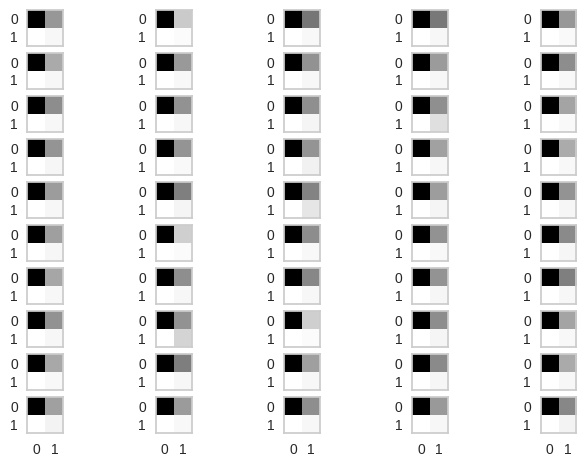

In [ ]:
k = 50
kmeans = KMeans(n_clusters=k, random_state = 123)
# compute distances from each cluster
X_digits_dist = kmeans.fit_transform(X_train.values)
# get indices of images closest to their cluster
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
# get the images corresponds to indices
X_representative_digits = X_train.iloc[representative_digit_idx].values

# Visualize representative images
fig, ax = plt.subplots(10,5)
for axi, i in zip(ax.ravel(), np.arange(0,50)):
    axi.imshow(X_representative_digits[i].reshape(2,2), cmap='Greys');
    axi.grid(False)


### Evaluation of Test Data
* Use the model to predict the labels for the Test data below
* Format the test data in the same format as the train data.
* Predict it with trained supervised ML model

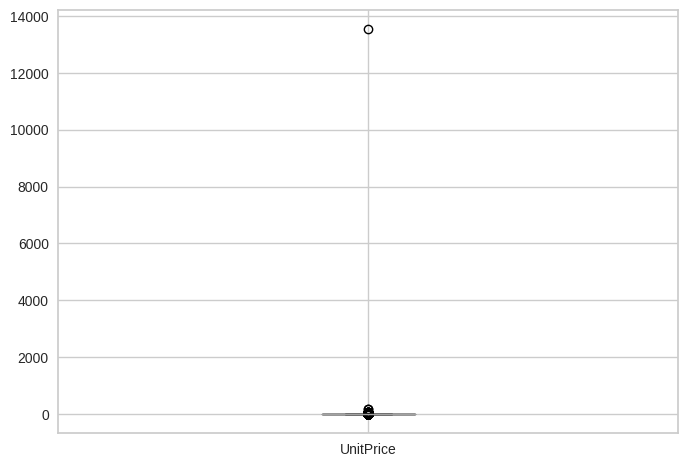

Attribute=UnitPrice Q1= 1.25, Q3= 4.13


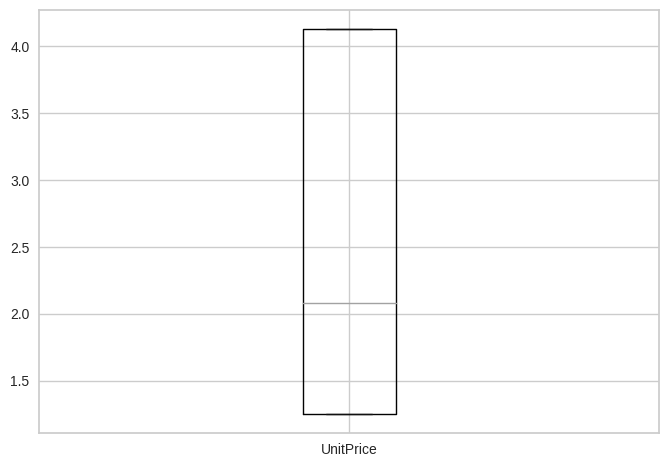

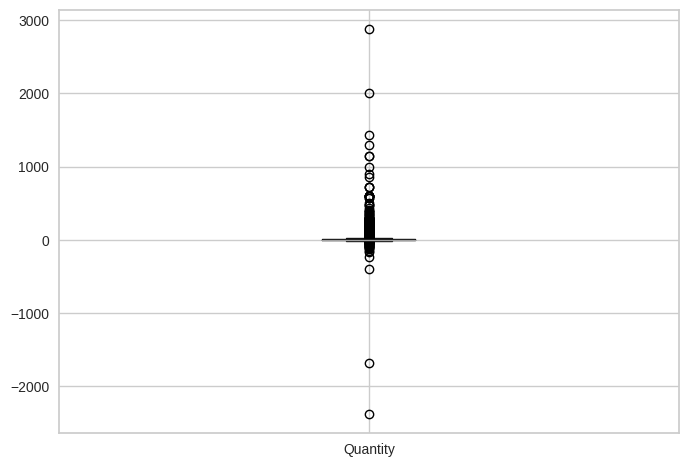

Attribute=Quantity Q1= 1.0, Q3= 10.0


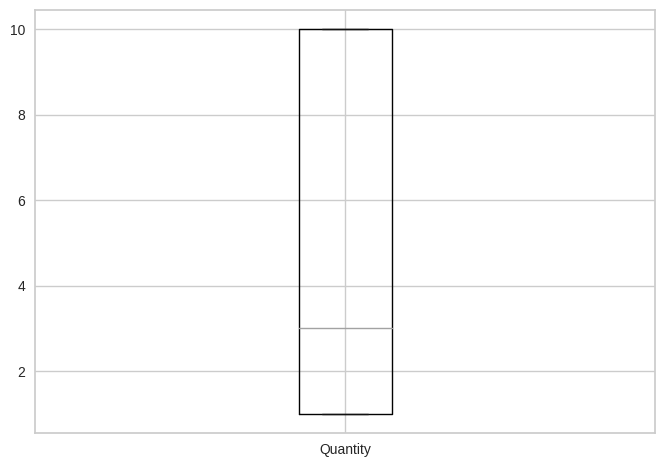

In [ ]:
# Test set provided as below
test = pd.read_csv("Online_Retail_Test.csv")
test.head(3)

preprocess(test)
test = preprocess_2(test)

In [ ]:
# YOUR CODE HERE
y_pred_test = xgb_clf.predict(test)
y_test_lables = kmeans.predict(test)



In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, log_loss

print(classification_report(y_test_lables, y_pred_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3306
           2       1.00      1.00      1.00         1

    accuracy                           1.00      3307
   macro avg       1.00      1.00      1.00      3307
weighted avg       1.00      1.00      1.00      3307



### Report Analysis

- Discuss the pros and cons of removing the missing values vs replacing with the mean values
- Based on the visualization of clusters, comment on the difference in buying patterns of each cluster
- What other methods could be used to determine the optimal no. of clusters?